In [1]:
from scipy import stats
import numpy as np
from sympy import symbols, Eq, solve
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product, chain
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches

# Проверка гипотзы о взаимосвязи номинативной и количественной переменной

O = [10, 10]
E = [5, 15]

alpha = 0.05

if sum(O) != sum(E):
    print(f'Массивы Е и О должны быть одного объёма (n = {sum(O)})')

else:
    # Определяем переменную x
    x = symbols('x')

    # Записываем уравнение
    # Левая часть: sum(O)
    # Правая часть: sum([i*x for i in E])
    equation = Eq(sum(O), sum([i*x for i in E]))

    # Решаем уравнение
    solution = solve(equation, x)

    # Выводим результат
    print("Решение уравнения:", solution[0])

    x_value=int(solution[0])
    arr_exp = np.array(O)
    arr_obs = np.array(E)*x_value
    chi = stats.chisquare(arr_exp, arr_obs)

    print(f"Chi^2: {chi[0]} with p-value: {chi[1]}" )
    print()
    
    if chi[1] < alpha:
        print('Отклоняем нулевую гипотезу о том, что генеральная совокупность имеет распределение номинативной переменной равное Е')
        print("Принимаем альтернативную гипотезу о том распределения генеральной совокупности отличны от Е")
    else: 
        print('Принимаем нулевую гипотезу о том, что генеральная совокупность имеет распределение номинативной переменной равное Е')
        print("Отклоняем альтернативную гипотезу о том распределения генеральной совокупности отличны от Е")

Решение уравнения: 1
Chi^2: 6.666666666666667 with p-value: 0.009823274507519235

Отклоняем нулевую гипотезу о том, что генеральная совокупность имеет распределение номинативной переменной равное Е
Принимаем альтернативную гипотезу о том распределения генеральной совокупности отличны от Е


                women  men
Тормозят           20   11
Притормаживают     11   18
Не тормозят         7   17

p value is 0.020467153858454955
Dependent (reject H0)

Expected outcome (таблица сопряжённости):
[[14.02380952 16.97619048]
 [13.11904762 15.88095238]
 [10.85714286 13.14285714]]

Degrees of freedom: 2
Chi: 7.7779


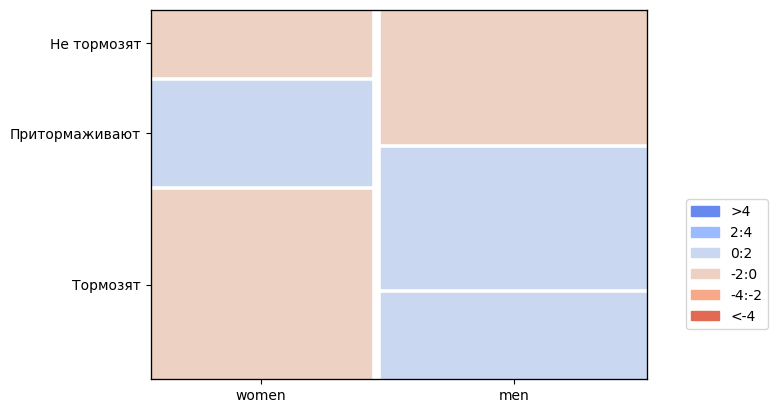

In [2]:
# Проверка гипотзы о взаимосвязи двух номинативных переменных

# defining the table

data = pd.DataFrame([[20, 11], 
        [11, 18], 
        [7, 17]], columns=['women','men'], index=['Тормозят', "Притормаживают", "Не тормозят"])

print(data)

print()

chi, pval, dof, expected = chi2_contingency(data)

# interpret p-value

threshold = 0.05

print("p value is " + str(pval))

if pval <= threshold:

    print('Dependent (reject H0)')

else:

    print('Independent (H0 holds true)')
    
print()

print("Expected outcome (таблица сопряжённости):", expected, "",sep='\n')

print("Degrees of freedom:",dof)

print('Chi: %.4f' %chi)

# Анализ остатков

#строим график

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности

    cure = list(data.columns)
    effect = list(data.index)
    idx = pd.MultiIndex.from_tuples(product(cure, effect))
    data = pd.Series(chain.from_iterable([tuple(data[i]) for i in data.columns]), index=idx)

    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est) / np.sqrt(est)
       
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.items()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))
    
make_me_plot(data)

